In [1]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.applications 
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
from keras.layers import MaxPooling2D,Conv2D
from keras.layers import Activation,Flatten,Dense,Dropout
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from os import listdir
import matplotlib.image as mpimg
import random
from keras.utils import to_categorical
from keras import regularizers



In [6]:
train_data_path="C:\\Users\\Aman Ingle\\Desktop\\ml project\\cotton_plant disease pred CNN\\train"
valid_data_path="C:\\Users\\Aman Ingle\\Desktop\\ml project\\cotton_plant disease pred CNN\\val"
test_data_path="C:\\Users\\Aman Ingle\\Desktop\\ml project\\cotton_plant disease pred CNN\\test"

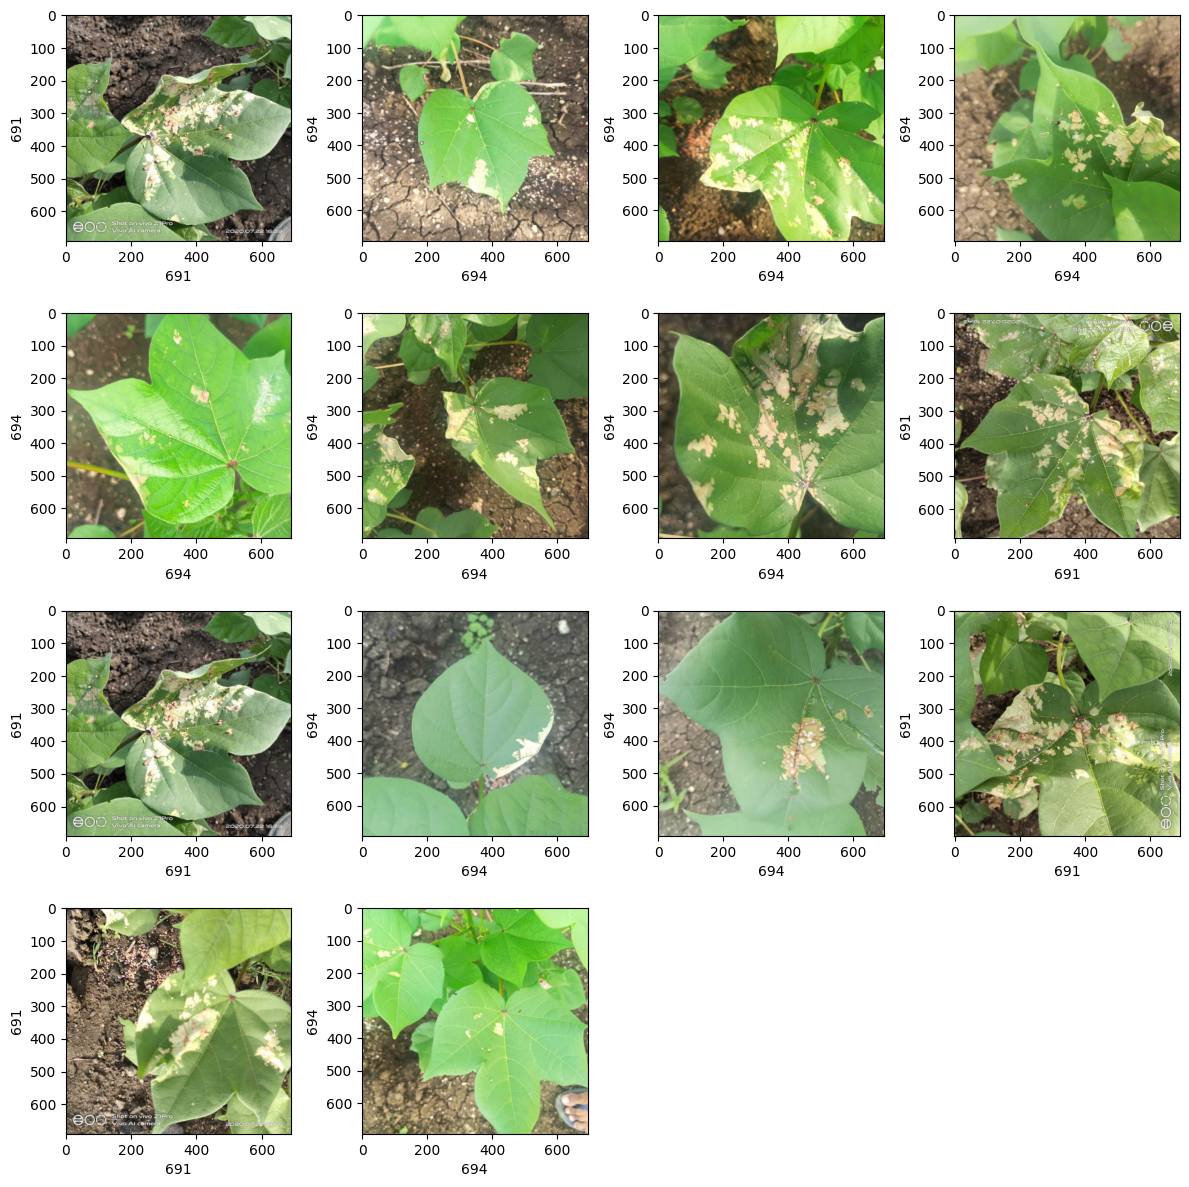

In [3]:
plt.figure(figsize=(12,12))
for i in range(1,15):
  plt.subplot(4,4,i)
  plt.tight_layout()
  img=mpimg.imread('/content/drive/MyDrive/cotton_plant disease pred CNN/train/diseased cotton leaf'+'/'+random.choice(sorted(os.listdir('/content/drive/MyDrive/cotton_plant disease pred CNN/train/diseased cotton leaf'))))
  plt.imshow(img)
  plt.xlabel(img.shape[1])
  plt.ylabel(img.shape[0])


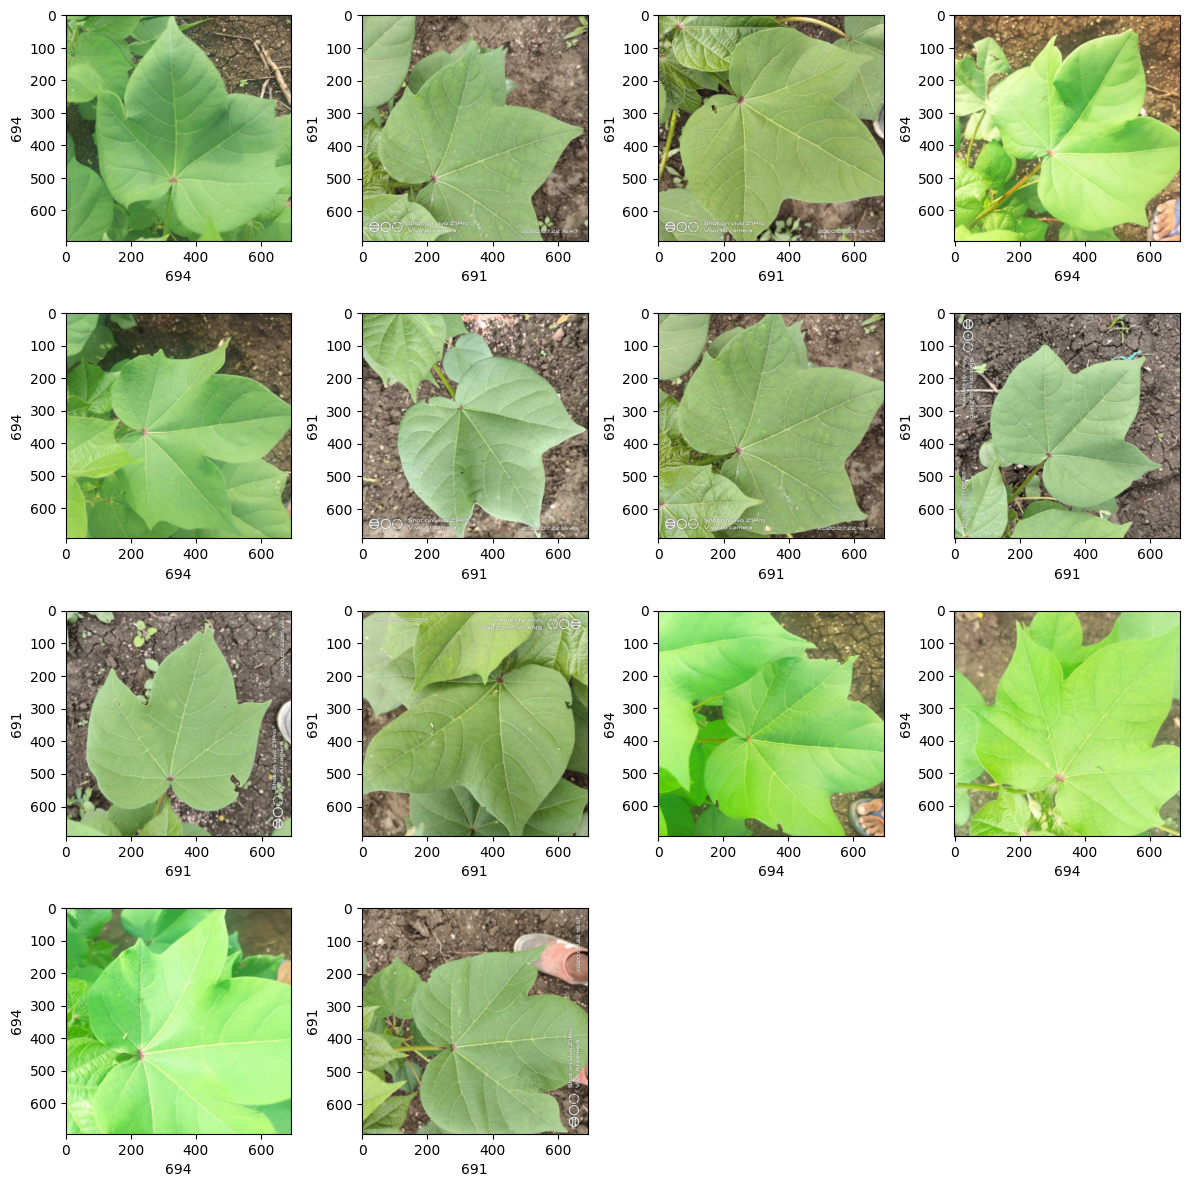

In [4]:
plt.figure(figsize=(12,12))
for i in range(1,15):
  plt.subplot(4,4,i)
  plt.tight_layout()
  img=mpimg.imread('/content/drive/MyDrive/cotton_plant disease pred CNN/train/fresh cotton leaf'+'/'+random.choice(sorted(os.listdir('/content/drive/MyDrive/cotton_plant disease pred CNN/train/fresh cotton leaf'))))
  plt.imshow(img)
  plt.xlabel(img.shape[1])
  plt.ylabel(img.shape[0])


In [7]:
import cv2
import numpy as np
from keras.preprocessing.image import img_to_array

def convert_image_to_array(image_dir):
    try:
        # Attempt to read the image using OpenCV
        image = cv2.imread(image_dir)

        # Check if the image is successfully read
        if image is not None:
            # Resize the image to the specified dimensions (256x256)
            image = cv2.resize(image, (256, 256))

            # Convert the image to a NumPy array using Keras function
            return img_to_array(image)
        else:
            # If the image is not read successfully, return an empty NumPy array
            return np.array([])

    except Exception as e:
        # Handle any exceptions that may occur during image processing
        print(f"Error: {e}")
        return None


In [8]:
# for train data
img_arr=[]
label_arr=[]
temp=-1
labels=[0,1,2,3]
for i in ['diseased cotton leaf','diseased cotton plant','fresh cotton leaf','fresh cotton plant']:
  pimg=listdir(f"{train_data_path}/{i}")
  temp+=1
  for j in pimg:
    image_path=f"{train_data_path}/{i}/{j}"
    img_arr.append(convert_image_to_array(image_path))
    label_arr.append(labels[temp])


In [9]:
# for valdation data
val_img_arr=[]
val_label_arr=[]
tem=-1
labels=[0,1,2,3]
for i in ['diseased cotton leaf','diseased cotton plant','fresh cotton leaf','fresh cotton plant']:
  val_pimg=listdir(f"{valid_data_path}/{i}")
  tem+=1
  for j in val_pimg:
    val_image_path=f"{valid_data_path}/{i}/{j}"
    val_img_arr.append(convert_image_to_array(val_image_path))
    val_label_arr.append(labels[tem])

In [10]:
# for test data
test_img_arr=[]
test_label_arr=[]
te=-1
labels=[0,1,2,3]
for i in ['diseased cotton leaf','diseased cotton plant','fresh cotton leaf','fresh cotton plant']:
  test_pimg=listdir(f"{test_data_path}/{i}")
  te+=1
  for j in test_pimg:
    test_image_path=f"{test_data_path}/{i}/{j}"
    test_img_arr.append(convert_image_to_array(test_image_path))
    test_label_arr.append(labels[te])

In [11]:
img_arr[0].shape

(256, 256, 3)

In [12]:
# Storing label arr into y_train
y_train_img=label_arr


In [68]:
# Storing label arr into y_val
y_val_img=val_label_arr
y_test_img=test_label_arr

In [69]:
# Converting both y_train and y_val into categotical data
y_train=to_categorical(y_train_img)
y_val=to_categorical(y_val_img)
y_test=to_categorical(y_test_img)

In [70]:
y_test

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [15]:
img_arr[520]

array([[[ 61.,  90.,  95.],
        [ 66.,  93.,  98.],
        [ 24.,  45.,  52.],
        ...,
        [107., 207., 147.],
        [100., 200., 142.],
        [ 96., 193., 140.]],

       [[ 73.,  93., 101.],
        [ 77.,  96., 104.],
        [ 20.,  39.,  47.],
        ...,
        [100., 200., 140.],
        [ 93., 193., 135.],
        [ 93., 191., 137.]],

       [[ 41.,  51.,  65.],
        [ 37.,  48.,  62.],
        [ 62.,  77.,  90.],
        ...,
        [ 97., 198., 137.],
        [ 91., 191., 133.],
        [ 96., 194., 140.]],

       ...,

       [[111., 193., 142.],
        [115., 189., 142.],
        [129., 191., 155.],
        ...,
        [ 35.,  98.,  54.],
        [ 35.,  96.,  52.],
        [ 36.,  94.,  50.]],

       [[112., 198., 125.],
        [117., 196., 126.],
        [131., 203., 135.],
        ...,
        [ 27.,  90.,  46.],
        [ 32.,  93.,  49.],
        [ 38.,  96.,  52.]],

       [[120., 199., 137.],
        [124., 197., 133.],
        [134., 2

In [16]:
label_arr[520]

1

In [17]:
len(img_arr)

1951

In [18]:
# To normalize the image array.
x_train_img=np.array(img_arr,dtype=np.float16)/255
x_val_img=np.array(val_img_arr,dtype=np.float16)/255
x_test_img=np.array(test_img_arr,dtype=np.float16)/255

In [19]:
x_train_img[520]

array([[[0.2393, 0.353 , 0.3726],
        [0.2588, 0.3647, 0.3843],
        [0.0941, 0.1765, 0.204 ],
        ...,
        [0.4197, 0.8115, 0.5767],
        [0.392 , 0.784 , 0.5566],
        [0.3765, 0.757 , 0.549 ]],

       [[0.2864, 0.3647, 0.396 ],
        [0.302 , 0.3765, 0.408 ],
        [0.0784, 0.153 , 0.1843],
        ...,
        [0.392 , 0.784 , 0.549 ],
        [0.3647, 0.757 , 0.5293],
        [0.3647, 0.749 , 0.537 ]],

       [[0.1608, 0.2   , 0.255 ],
        [0.1451, 0.1882, 0.2432],
        [0.2432, 0.302 , 0.353 ],
        ...,
        [0.3804, 0.7764, 0.537 ],
        [0.357 , 0.749 , 0.5215],
        [0.3765, 0.7607, 0.549 ]],

       ...,

       [[0.4353, 0.757 , 0.5566],
        [0.451 , 0.741 , 0.5566],
        [0.506 , 0.749 , 0.608 ],
        ...,
        [0.1372, 0.3843, 0.2118],
        [0.1372, 0.3765, 0.204 ],
        [0.1412, 0.3687, 0.196 ]],

       [[0.4392, 0.7764, 0.4902],
        [0.4587, 0.7686, 0.4941],
        [0.5137, 0.796 , 0.5293],
        .

In [20]:
x_train_img.reshape(-1,256,256,3)



array([[[[0.349   , 0.8115  , 0.5176  ],
         [0.3293  , 0.788   , 0.4941  ],
         [0.3254  , 0.792   , 0.4941  ],
         ...,
         [0.255   , 0.4275  , 0.3372  ],
         [0.4197  , 0.549   , 0.4666  ],
         [0.4275  , 0.5566  , 0.4746  ]],

        [[0.353   , 0.8037  , 0.5137  ],
         [0.3765  , 0.8276  , 0.537   ],
         [0.3804  , 0.8315  , 0.541   ],
         ...,
         [0.3687  , 0.4902  , 0.4038  ],
         [0.349   , 0.4785  , 0.396   ],
         [0.2825  , 0.4119  , 0.3293  ]],

        [[0.3372  , 0.7725  , 0.4824  ],
         [0.4038  , 0.8394  , 0.549   ],
         [0.4119  , 0.847   , 0.5566  ],
         ...,
         [0.3647  , 0.443   , 0.353   ],
         [0.341   , 0.4707  , 0.3882  ],
         [0.3176  , 0.447   , 0.3647  ]],

        ...,

        [[0.5845  , 0.855   , 0.6313  ],
         [0.596   , 0.8667  , 0.643   ],
         [0.5845  , 0.855   , 0.6313  ],
         ...,
         [0.341   , 0.447   , 0.502   ],
         [0.306   , 0.

In [21]:
x_val_img.reshape(-1,256,256,3)


array([[[[0.6157 , 0.9136 , 0.686  ],
         [0.6196 , 0.9175 , 0.6904 ],
         [0.6274 , 0.9253 , 0.698  ],
         ...,
         [0.2118 , 0.2471 , 0.2864 ],
         [0.2196 , 0.2432 , 0.2705 ],
         [0.2196 , 0.2471 , 0.2744 ]],

        [[0.6196 , 0.9175 , 0.6904 ],
         [0.6274 , 0.9253 , 0.698  ],
         [0.6353 , 0.933  , 0.702  ],
         ...,
         [0.1921 , 0.2274 , 0.2666 ],
         [0.1843 , 0.2079 , 0.2354 ],
         [0.1843 , 0.2079 , 0.2354 ]],

        [[0.6274 , 0.9253 , 0.698  ],
         [0.6353 , 0.933  , 0.706  ],
         [0.639  , 0.937  , 0.71   ],
         ...,
         [0.1804 , 0.2157 , 0.255  ],
         [0.1765 , 0.204  , 0.2274 ],
         [0.1765 , 0.2    , 0.2274 ]],

        ...,

        [[0.4746 , 0.714  , 0.4548 ],
         [0.447  , 0.686  , 0.4275 ],
         [0.443  , 0.682  , 0.4236 ],
         ...,
         [0.4158 , 0.847  , 0.541  ],
         [0.408  , 0.8667 , 0.5566 ],
         [0.408  , 0.8667 , 0.5566 ]],

        [[

In [23]:
x_test_img.reshape(-1,256,256,3)

array([[[[0.251  , 0.302  , 0.3098 ],
         [0.2393 , 0.2903 , 0.2825 ],
         [0.2471 , 0.298  , 0.306  ],
         ...,
         [0.3452 , 0.3882 , 0.4666 ],
         [0.3765 , 0.4197 , 0.498  ],
         [0.408  , 0.451  , 0.5293 ]],

        [[0.3293 , 0.3765 , 0.392  ],
         [0.2196 , 0.2942 , 0.2942 ],
         [0.298  , 0.349  , 0.357  ],
         ...,
         [0.4119 , 0.443  , 0.5137 ],
         [0.3372 , 0.3804 , 0.4587 ],
         [0.392  , 0.4353 , 0.5176 ]],

        [[0.5884 , 0.608  , 0.643  ],
         [0.5845 , 0.608  , 0.651  ],
         [0.3098 , 0.3765 , 0.3882 ],
         ...,
         [0.3647 , 0.396  , 0.4626 ],
         [0.3452 , 0.3882 , 0.4666 ],
         [0.392  , 0.447  , 0.5215 ]],

        ...,

        [[0.541  , 0.7295 , 0.6743 ],
         [0.3687 , 0.4941 , 0.4746 ],
         [0.2705 , 0.2903 , 0.3254 ],
         ...,
         [0.51   , 0.5215 , 0.5923 ],
         [0.451  , 0.4824 , 0.537  ],
         [0.392  , 0.408  , 0.451  ]],

        [[

In [24]:

model=Sequential()
model.add(Conv2D(64,(3,3),padding='same',input_shape=(256,256,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.5))
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.3))
model.add(Conv2D(16,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(4,activation='softmax'))
model.summary()










Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 activation (Activation)     (None, 256, 256, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 85, 85, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 32)        18464     
                                                                 
 activation_1 (Activation)   (None, 85, 85, 32)        0         
                                                      

In [25]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
m=model.fit(x_train_img,y_train,batch_size=60,epochs=30,validation_data=(x_val_img,y_val))

Epoch 1/30


33/33 [==============================] - 111s 3s/step - loss: 2.9935 - accuracy: 0.4162 - val_loss: 2.3175 - val_accuracy: 0.5031
Epoch 2/30
33/33 [==============================] - 88s 3s/step - loss: 1.8565 - accuracy: 0.5397 - val_loss: 1.6078 - val_accuracy: 0.5247
Epoch 3/30
33/33 [==============================] - 89s 3s/step - loss: 1.3654 - accuracy: 0.5987 - val_loss: 1.2987 - val_accuracy: 0.5957
Epoch 4/30
33/33 [==============================] - 92s 3s/step - loss: 1.1262 - accuracy: 0.6484 - val_loss: 1.1050 - val_accuracy: 0.6389
Epoch 5/30
33/33 [==============================] - 94s 3s/step - loss: 0.9529 - accuracy: 0.6966 - val_loss: 0.9737 - val_accuracy: 0.6481
Epoch 6/30
33/33 [==============================] - 92s 3s/step - loss: 0.8516 - accuracy: 0.7381 - val_loss: 0.8822 - val_accuracy: 0.7099
Epoch 7/30
33/33 [==============================] - 87s 3s/step - loss: 0.7730 - accuracy: 0.7412 - val_loss: 0.7315 - val_accuracy: 0.8056
Epoch 8/30
33/33 

In [27]:
model.save("C:\\Users\\Aman Ingle\\Desktop\\ml project\\cotton_plant disease pred CNN\\model2.h5")


C:\Users\Aman Ingle\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


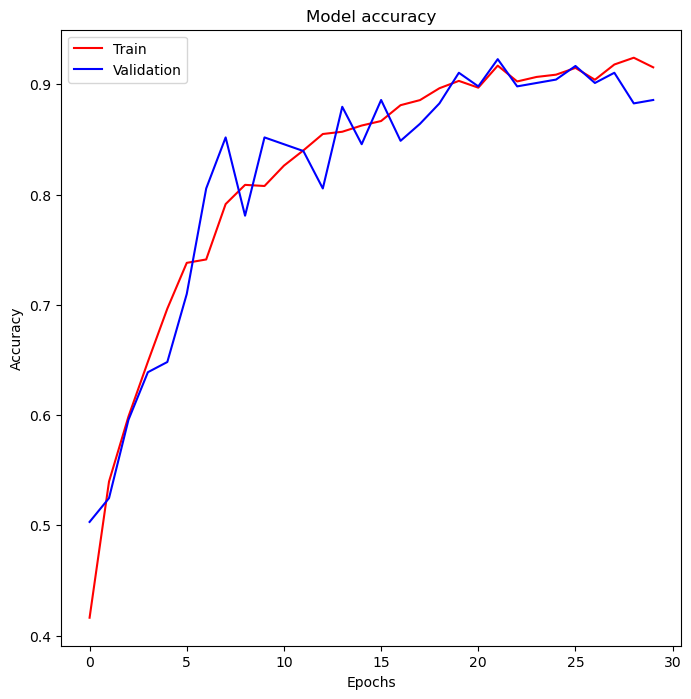

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.plot(m.history['accuracy'], color='r')
plt.plot(m.history['val_accuracy'], color='b')
plt.title("Model accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()


In [34]:
y_predc=model.predict(x_test_img)

1/1 [==============================] - 0s 187ms/step


In [35]:
y_predc

array([[9.9990463e-01, 1.0135516e-05, 7.7902136e-05, 7.3265760e-06],
       [9.9993598e-01, 9.5133919e-06, 2.4393774e-05, 3.0090308e-05],
       [2.3136169e-02, 4.6076060e-08, 9.7686356e-01, 1.4496271e-07],
       [4.8214861e-05, 9.9811816e-01, 4.0707970e-04, 1.4266560e-03],
       [4.1062183e-05, 9.9155360e-01, 3.2392568e-06, 8.4020542e-03],
       [1.2285449e-05, 9.9394882e-01, 1.5458912e-06, 6.0373032e-03],
       [5.9882623e-06, 9.7596145e-01, 2.1076621e-06, 2.4030488e-02],
       [8.3805222e-05, 9.9296016e-01, 2.9612367e-05, 6.9264239e-03],
       [3.2844532e-02, 3.0105295e-02, 9.1962117e-01, 1.7428951e-02],
       [2.3989545e-02, 3.2063726e-02, 8.8209492e-01, 6.1851896e-02],
       [9.8455246e-05, 3.7204506e-07, 9.9989307e-01, 8.1233020e-06],
       [1.5505522e-05, 1.8495143e-06, 9.9998164e-01, 1.0087928e-06],
       [1.3450739e-05, 1.0040108e-07, 9.9998569e-01, 7.6904200e-07],
       [1.2016861e-05, 8.7811038e-02, 9.7687996e-04, 9.1120005e-01],
       [8.9348561e-07, 3.7573782e-

In [37]:
#converting probabilities into classes 0,1,2,3.
y_predct=np.argmax(y_predc,axis=1)
y_predct

array([0, 0, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 1, 3, 3], dtype=int64)

In [59]:
test_label_arr

[0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]

In [60]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_label_arr, y_predct)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 88.89%
